loading the dataset

In [82]:
import pandas as pd
import numpy as np
from sklearn import cluster
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler

importing dataset from kaggle

In [83]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [84]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [85]:
new_df = df.iloc[:,:-1]
new_df.head()

,CustomerID,Gender,Age,Annual Income (k$)
0,1,Male,19,15
1,2,Male,21,15
2,3,Female,20,16
3,4,Female,23,16
4,5,Female,31,17


data visualisation

In [86]:
df=df.drop('CustomerID',axis=1)

In [87]:
df.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [88]:
df.shape

(200, 4)

univariate analysis

<function matplotlib.pyplot.show(close=None, block=None)>

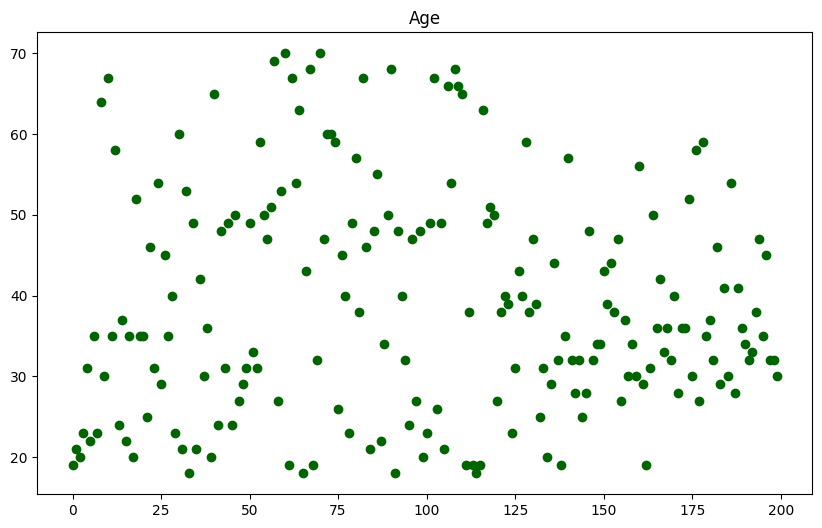

In [89]:
plt.figure(figsize=(10, 6))
plt.scatter(df.index,df['Age'],c="darkgreen")
plt.title('Age')
plt.show

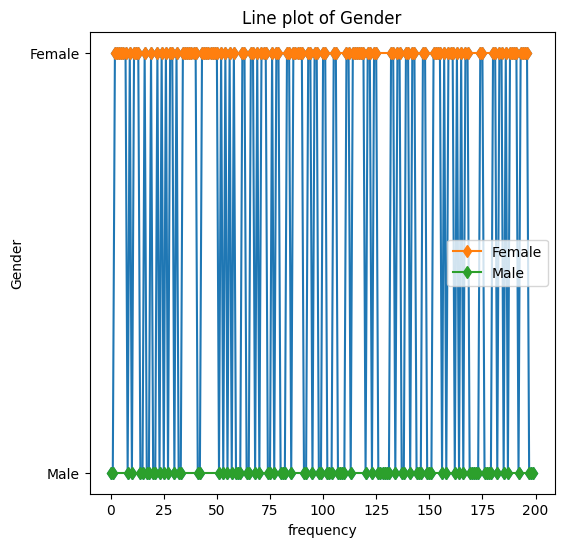

In [90]:
plt.figure(figsize=(6,6))
plt.title('Line plot of Gender')
plt.xlabel('frequency',fontsize=10)
plt.ylabel('Gender',fontsize=10)
plt.plot(df.index,df['Gender'],markevery=1,marker='d')
for name, group in df.groupby('Gender'):
  plt.plot(group.index, group['Gender'],label=name,markevery=1,marker='d')
plt.legend()
plt.show()

<Axes: ylabel='Annual Income (k$)'>

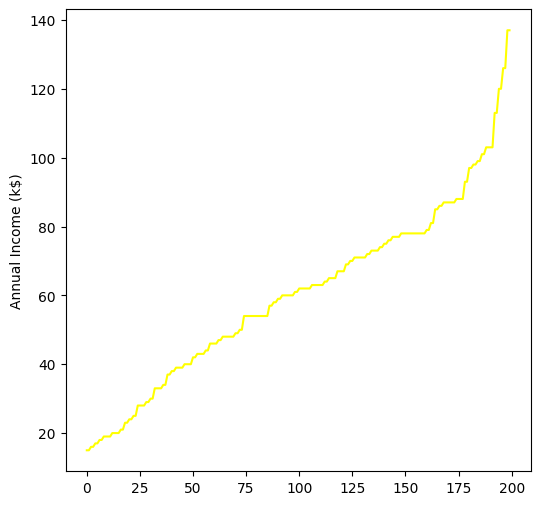

In [91]:
plt.figure(figsize=(6,6))
sns.lineplot(df['Annual Income (k$)'],c="yellow")

(array([16., 20., 10., 17., 35., 37., 11., 24., 14., 16.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

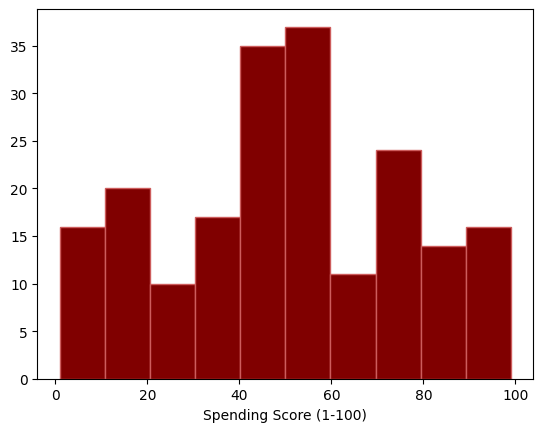

In [92]:
plt.xlabel('Spending Score (1-100)')
plt.hist(df['Spending Score (1-100)'],edgecolor="indianred",color="maroon")

<ipython-input-93-6d09a2fcd15a>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Spending Score (1-100)'], shade=True, color='mistyrose')


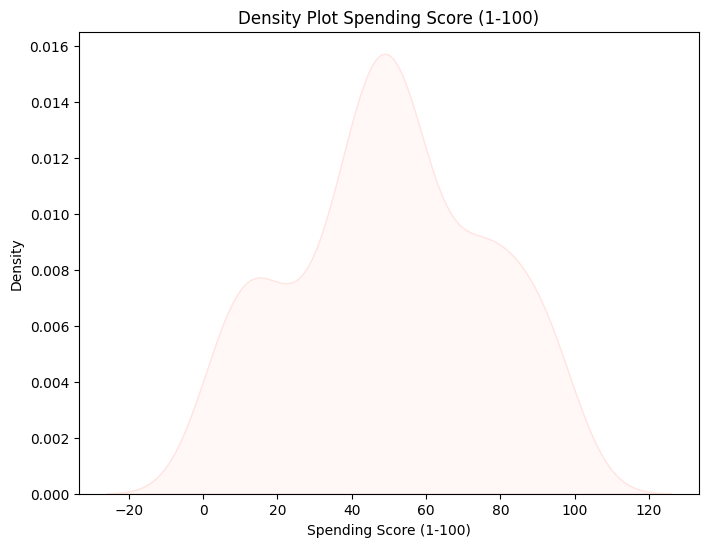

In [93]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Spending Score (1-100)'], shade=True, color='mistyrose')
plt.title('Density Plot Spending Score (1-100)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Density')
plt.show()

bi-variate analysis

<Axes: xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

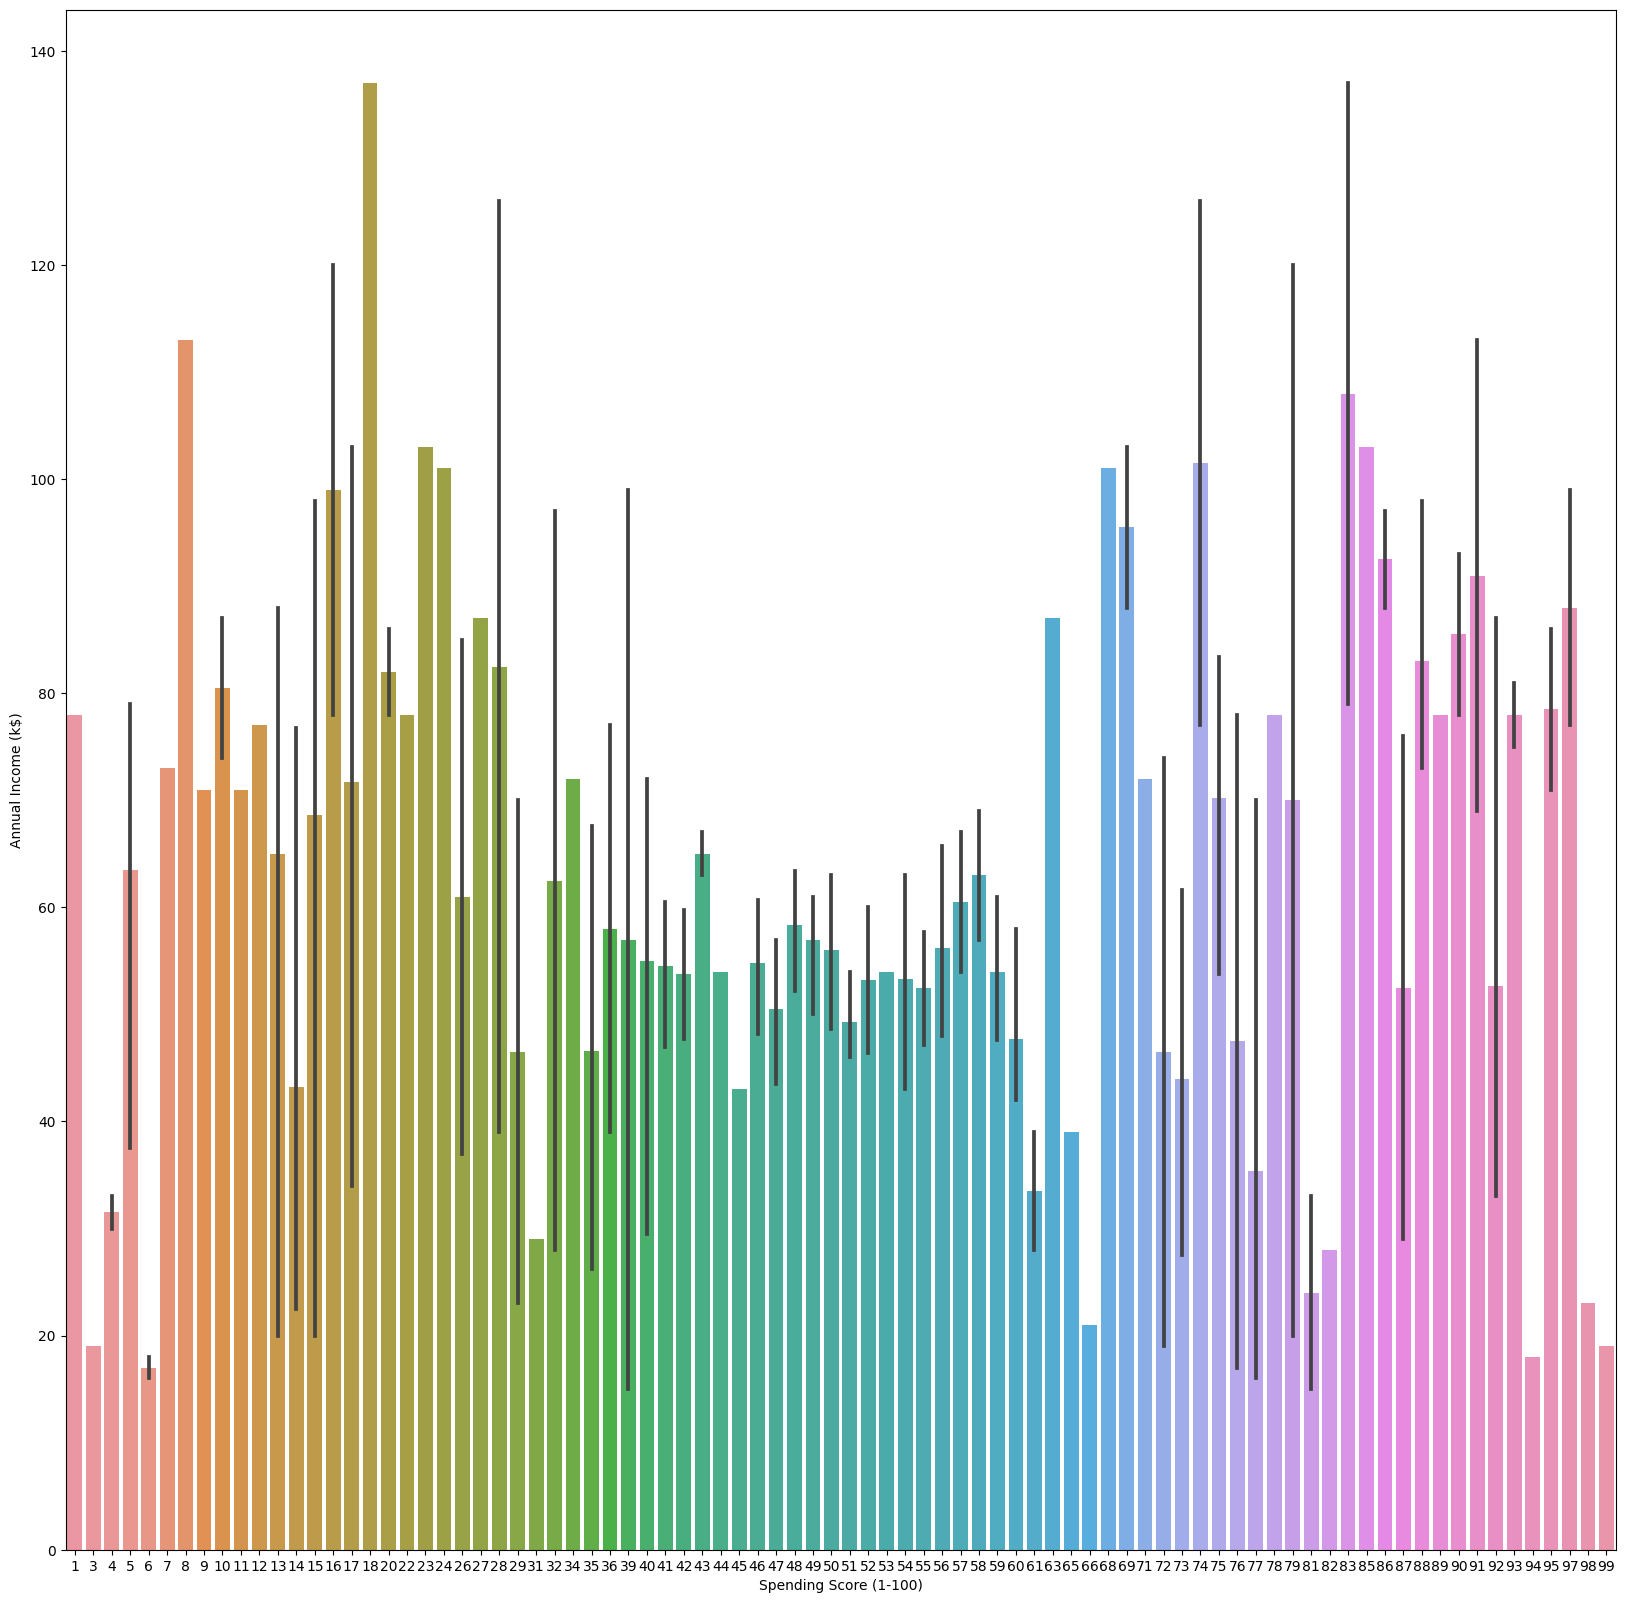

In [94]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
sns.barplot(y=df['Annual Income (k$)'], x=df['Spending Score (1-100)'])

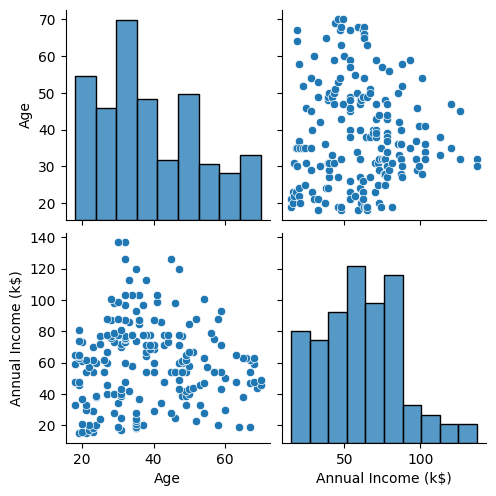

In [95]:
sns.pairplot(df, vars=['Age', 'Annual Income (k$)'])
plt.show()

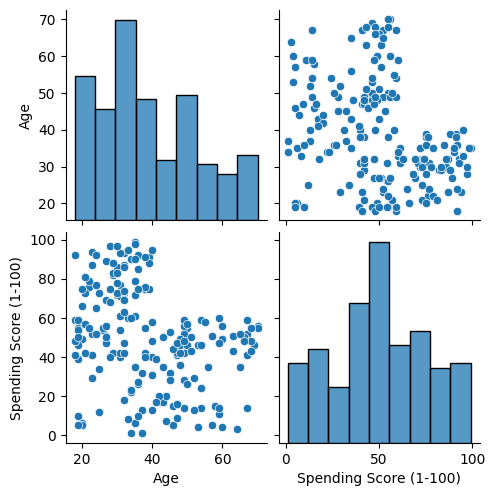

In [96]:
sns.pairplot(df, vars=['Age', 'Spending Score (1-100)'])
plt.show()

multivariate analysis

<ipython-input-97-c12aac45c648>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), annot=True, linewidths=.5)


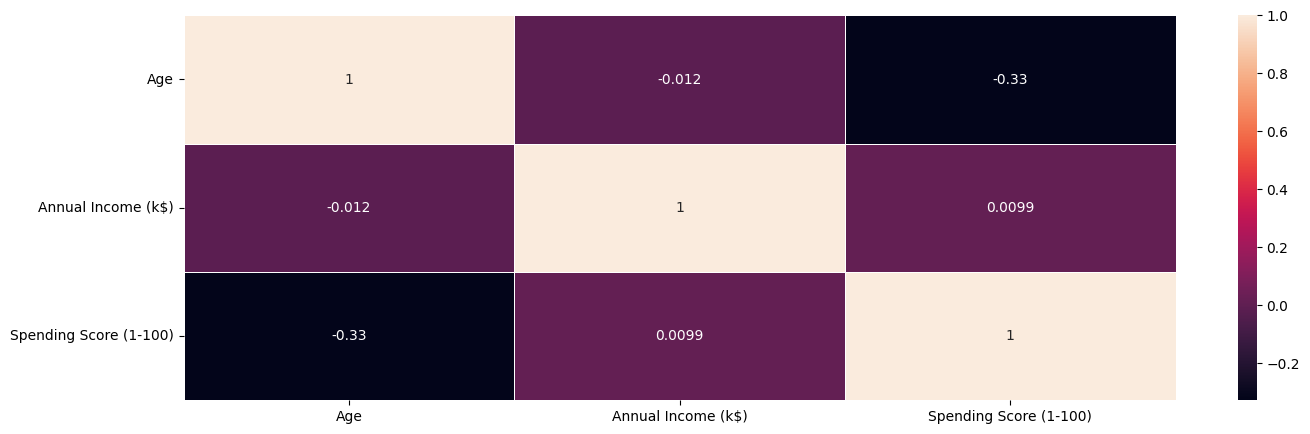

In [97]:
plt.figure(figsize = (16,5))
ax = sns.heatmap(df.corr(), annot=True, linewidths=.5)

data preprocessing

In [98]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


missing values

In [100]:
df.isnull().any()

Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [101]:
#df = df.dropna(axis=0)
df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

label encoding

In [102]:
label_encoder = preprocessing.LabelEncoder()

df.loc[:, 'Gender'] = label_encoder.fit_transform(df['Gender'])

<ipython-input-102-5fdc99e04cb8>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:, 'Gender'] = label_encoder.fit_transform(df['Gender'])


In [103]:
df.head

<bound method NDFrame.head of      Gender  Age  Annual Income (k$)  Spending Score (1-100)
0         1   19                  15                      39
1         1   21                  15                      81
2         0   20                  16                       6
3         0   23                  16                      77
4         0   31                  17                      40
..      ...  ...                 ...                     ...
195       0   35                 120                      79
196       0   45                 126                      28
197       1   32                 126                      74
198       1   32                 137                      18
199       1   30                 137                      83

[200 rows x 4 columns]>

scaling

In [104]:
scaler = MinMaxScaler()
model=scaler.fit(df)
scaled_data=model.transform(df)

k-means clustering

In [105]:
error=[]
for i in range(1,31):
  kmeans = cluster.KMeans(n_clusters=i,init = 'k-means++',random_state=0)
  kmeans.fit(scaled_data)
  error.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [106]:
error

[86.68148216035944,
 37.27227241211876,
 29.552857611943857,
 22.39096001192855,
 19.07663788272297,
 16.42946794469996,
 14.22521748204564,
 12.223518502025357,
 10.600432969550852,
 9.399802915576311,
 8.469683169888476,
 7.744004385796988,
 7.055827250099865,
 6.451202239486763,
 6.156791307674487,
 5.6525812669403255,
 5.410618573763075,
 5.139548435409061,
 4.83735249725607,
 4.554210276672666,
 4.235683746795644,
 4.222484769975927,
 3.858259524486769,
 3.717234452459908,
 3.542218471435166,
 3.3880174068635514,
 3.236179643191276,
 3.1180683900740394,
 2.9860207648610873,
 2.867655731477896]

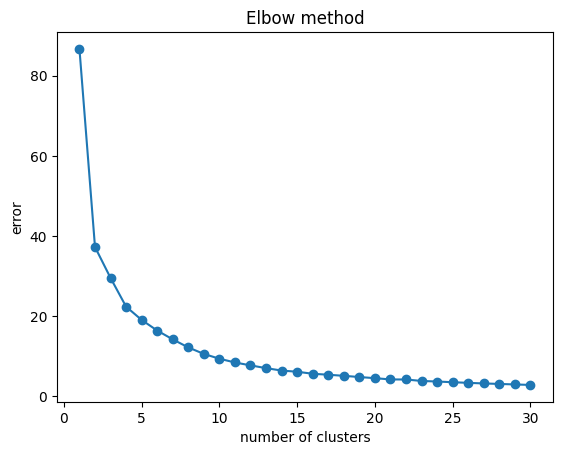

In [107]:
plt.plot(range(1,31),error, marker='o', linestyle='-')
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()


In [108]:
km_model = cluster.KMeans(n_clusters=5,init = 'k-means++',random_state=0)

In [109]:
km_model.fit(scaled_data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [110]:
pred = km_model.predict(df)
pred

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


array([3, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 3, 3, 4, 3, 3, 4, 4, 4, 4, 4, 3, 4, 4, 3, 4, 4, 4, 3,
       4, 4, 3, 3, 4, 4, 4, 4, 4, 3, 4, 3, 3, 4, 4, 3, 4, 4, 3, 4, 4, 3,
       3, 4, 4, 3, 4, 4, 3, 3, 4, 3, 4, 3, 3, 4, 4, 3, 4, 3, 4, 4, 4, 4,
       4, 3, 3, 3, 3, 3, 4, 3, 4, 4, 3, 4, 3, 3, 3, 3, 4, 3, 4, 3, 4, 3,
       3, 3, 0, 3, 0, 3, 0, 3, 4, 3, 3, 3, 0, 3, 4, 3, 0, 3, 0, 3, 4, 3,
       4, 3, 0, 3, 0, 3, 4, 3, 0, 3, 4, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       4, 3, 4, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

In [111]:
kmeans.cluster_centers_

array([[ 0.00000000e+00,  3.01282051e-01,  7.43169399e-01,
         8.36734694e-01],
       [ 1.00000000e+00,  2.37179487e-01,  3.82513661e-02,
         2.85714286e-01],
       [ 0.00000000e+00,  5.62500000e-01,  1.07581967e-01,
         1.56887755e-01],
       [ 1.00000000e+00,  5.42735043e-01,  3.83424408e-01,
         4.58049887e-01],
       [ 5.55111512e-17,  2.39316239e-01,  2.54098361e-01,
         4.95464853e-01],
       [-5.55111512e-17,  8.57692308e-01,  3.06557377e-01,
         5.05102041e-01],
       [ 1.00000000e+00,  3.52564103e-01,  4.64480874e-01,
         7.48299320e-01],
       [ 0.00000000e+00,  5.38461538e-01,  8.85245902e-01,
         2.14285714e-01],
       [ 1.00000000e+00,  2.78846154e-01,  9.01639344e-01,
         1.22448980e-01],
       [ 1.00000000e+00,  9.23076923e-02,  9.67213115e-02,
         8.59183673e-01],
       [ 1.00000000e+00,  7.40384615e-01,  5.67622951e-01,
         1.58163265e-01],
       [-5.55111512e-17,  1.10139860e-01,  9.46348733e-02,
      

In [112]:
df['cluster_of_data']=pred
df

,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster_of_data
0,1,19,15,39,3
1,1,21,15,81,3
2,0,20,16,6,4
3,0,23,16,77,3
4,0,31,17,40,4
...,...,...,...,...,...
195,0,35,120,79,3
196,0,45,126,28,0
197,1,32,126,74,3
198,1,32,137,18,0


In [113]:
# Test the model with random observation

km_model.predict([[1,40,100,77]])

array([3], dtype=int32)

In [114]:
km_model.predict([[0,2.0,1.1,1.2]])

array([2], dtype=int32)

In [115]:
# cluster labels of each data point using km_model.labels_
# PCA instance for reducing the data to 2 dimensions
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df)

# Add cluster labels to the reduced data
pca_df = pd.DataFrame(data=pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = km_model.labels_

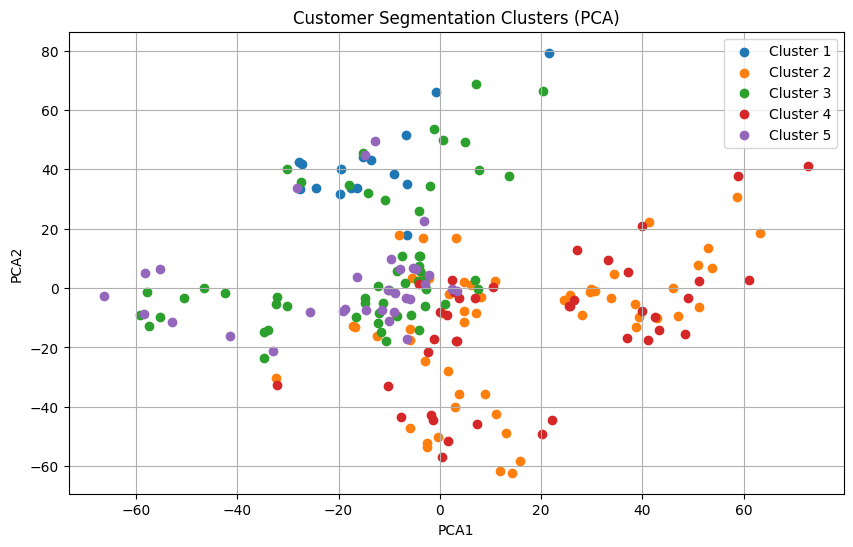

In [116]:
#scatter plot
plt.figure(figsize=(10,6))

# scatter plot for each cluster
for cluster_label in range(5):
    cluster_data = pca_df[pca_df['Cluster'] == cluster_label]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster_label + 1}')


plt.title('Customer Segmentation Clusters (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid(True)
plt.show()
